# FINAL REPORT

## Shot Type for Ads

To solve the project we used two models:

 a. CNN 2D + RNN

 Reference: https://keras.io/examples/vision/video_classification/

 b. CNN 3D (2D+1) with residual connections

 Reference: https://www.tensorflow.org/tutorials/video/video_classification

Along the present report, we'll explain pre-processing, data preparation, implementation, training, test, and results for both models

### 1. EDA (Exploratory Data Analysis)

We did an exhaustive analysis of the data, which is contained on: `/notebooks/EDA.ipynb`

### 2. CNN + RNN

##### 2.1  - Scale Shot

We had to work with videos, which consists of an ordered sequence of frames. Each frame contains spatial information, and the sequence of those frames contains temporal information. To model both of these aspects, we use a hybrid architecture that consists of 2D convolutions (for spatial processing) as well as recurrent layers (for temporal processing). 

So, We used a Convolutional Neural Network (CNN) and a Recurrent Neural Network (RNN) consisting of GRU layers. This kind of hybrid architecture is popularly known as a CNN-RNN.

The implementation of this model is on: `/notebooks/static/Static_shot_CNN_RNN.ipynb`

Pipeline


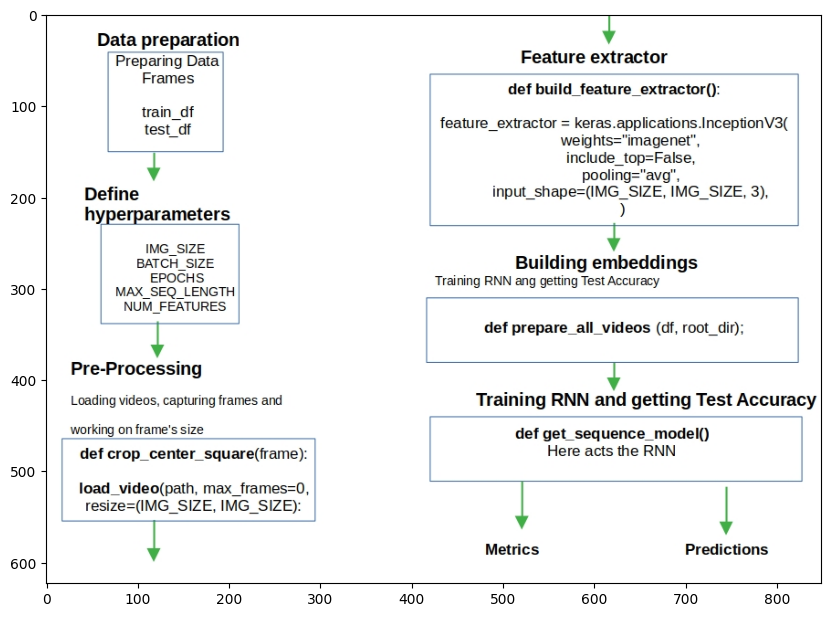

In [8]:
import cv2
import matplotlib.pyplot as plt

img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/pipeline_cnn_rnn.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,14))
plt.imshow(img2)
plt.show()

2.1.1 Data preparation and pre-processing

We had to prepare folders and files structure. We did it with: `scripts/CNN_RNN/prepare_train_test_dataset.py`

With this script, we separated and copied images coming from the original dataset between the `train` and `test` folders 
according to the key `train`  or `test` from `v1_split_trailer.json`.

The script also created all the needed subfolders inside `train`/`test` in order
to copy each video to the folder corresponding to its class.

In [ ]:
'''
The resulting directory structure should look like this:
    data/
    ├── trailer
    ├── trailer_v2
    ├── README.pdf
    ├── v1_full_trailer.json
    ├── v1_split_trailer.json
    ├── v2_full_trailer.json
    ├── trailer_v3
    │   ├── test
    │   │   ├── shot_<id_movie>_<id_shot>.mp4
    │   ├── train
    │   │   ├── shot_<id_movie>_<id_shot>.mp4

'''

While "trailer" and "trailer_v2" belong to the original dataset, "trailer_v3" is the structure created by the script.

Once we had the folders and files structure, we had to prepare the data frame with the test and training data.


We did it in a notebook called : `notebooks/static/Static_shot_CNN_RNN.ipynb` in the section `Preparing training data`


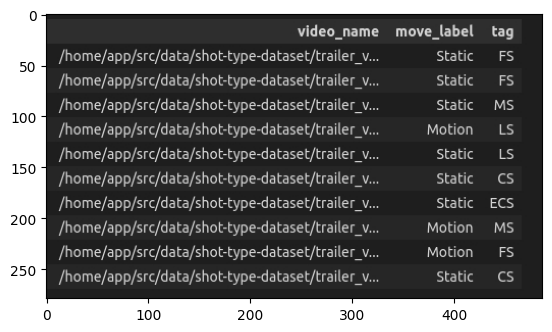

In [5]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/dataframe_train.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

The pipeline used "video name" and "tag" both for train and test.

Continuing with the pipeline, we do the pre-processing, which consists of loading videos, capturing frames and 
working on the frame's size, adapting it to the Inception V3 required size (224 x 224).

Here we use "crop_center_square" and "load_video" functions

2.1.2 Feature extractor

Continuing with the pipeline, as a feature extractor, we use an Inception V3 model.

The CNN receives a sequence of frames, applies different kernels, and returns an embedding (a numeric representation of the video) in a NumPy tensor format.


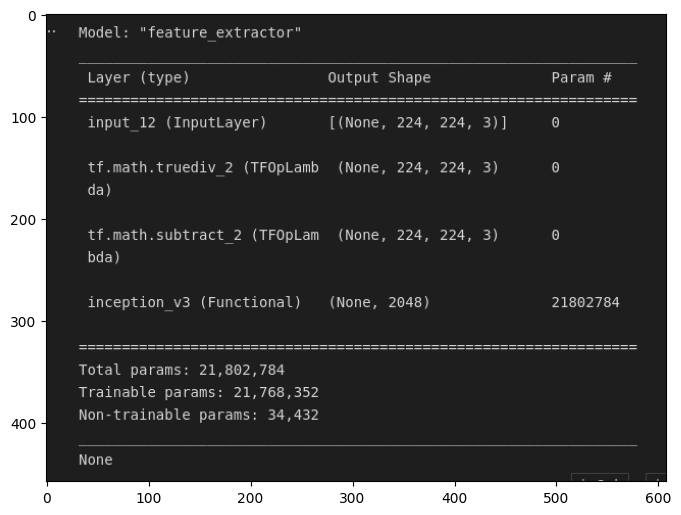

In [10]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/inception_v3.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,12))
plt.imshow(img2)
plt.show()

2.1.3 RNN trainining


For work with the temporal dimension, we use a GRU RNN model, which has been configured as can be seen below:

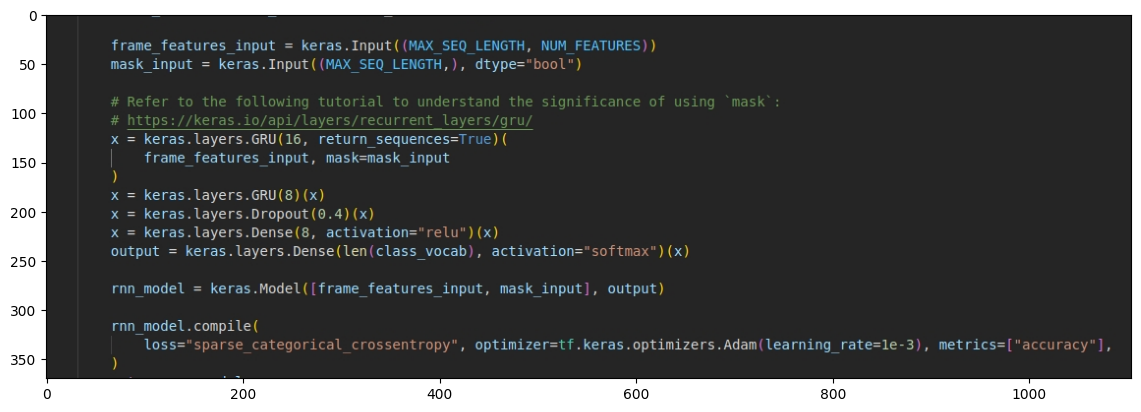

In [13]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/rnn_static.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14,18))
plt.imshow(img2)
plt.show()

### Results

 `With a 20 epochs train over the RNN, we had a test accuracy of 84%`

We achieved this result using the complete dataset of more than 33.000 videos with 30 frames per video. 

The validation set was taken from the train set, and was 30% of the train.

The embeddings buiding tooks near 72 hours.



We already got good results with a considerable less quantity of data:

`With a 20 epochs train over the RNN, we had a test accuracy of 81.7%`

We achieved this result using a dataset of 10.000 videos with only 10 frames per video. 

The validation set was taken from the train set, and was 30% of the train.

Some metrics of this proccess:

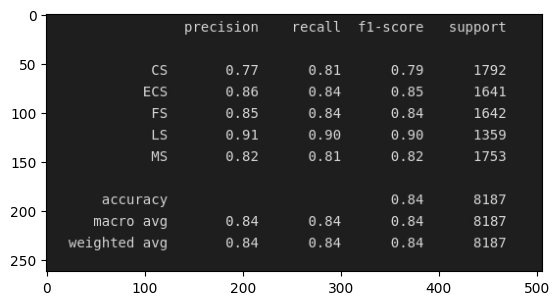

In [16]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/scale_shot_84_percent_metrics.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

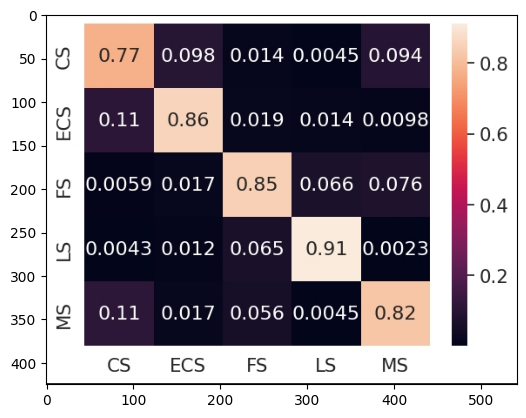

In [17]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/scale_shot_84_percent_confusion_matrix.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

##### Scale Shot

Conclusions:

* For Static Shot we worked with a balanced dataset with 5 classes. 

* We use a Inception V3 model as a feature extractor, and a GRU RNN model as a temporal organizator.

* Using CNN+RNN we've achieved good results. If we compare our test accuracy = 84% with the reference paper, they obtained an 87.7% with the best performance. We are close to the state-of-the-art values.

* If we check F1 for every class, we can see also that the model has a good performance for each class, between 77 - 91 %, and a weighted av F1 = 84%. which talks about the model is recognizing every class and predicting with high precision and recall.




##### 2.2 Movement Shot

This part of the work presented a big problem: a very unbalanced dataset aggravated by the few quantity of videos for two of the four classes.

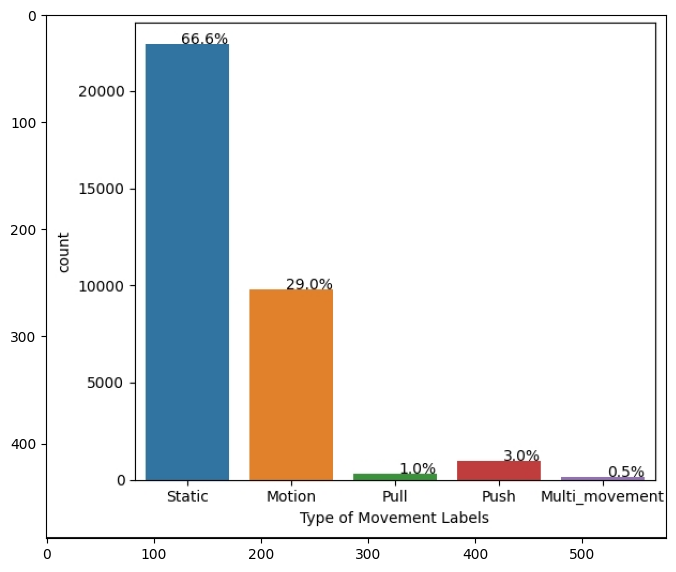

In [14]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/unbalanced_dataset.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,12))
plt.imshow(img2)
plt.show()

While we had nearly 23.000 videos of Static and 10.000 of Motion, we only had 200 of Pull and 619 of Push.

In the first experiments using this dataset with the CNN+RNN, we found that the model only learned about the two majority classes.

The model didn't work for the four classes. 

Using the reference test dataset (which was used by the reference paper authors) we had an accuracy of 68%, but it is a tricky metric because only shows the matches of two classes. The f1-score downs until 0% in the two minority classes.

Referring to the classes, we deleted "Multi_movement" because it didn't appear in the reference paper.

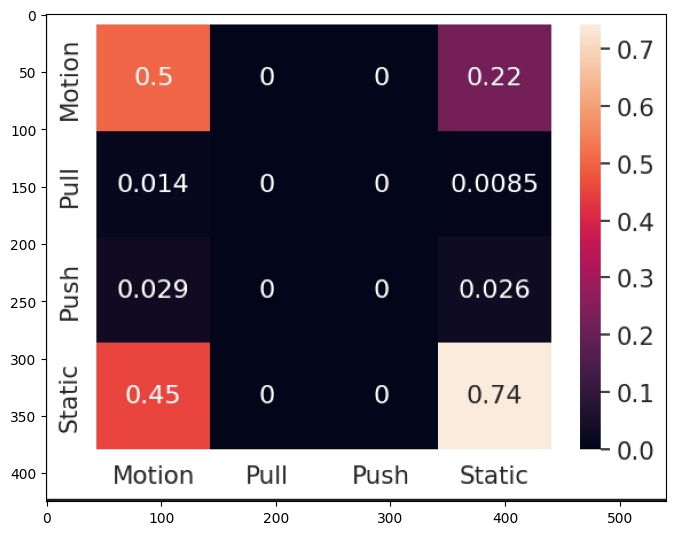

In [18]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/move_shot_cnn_rnn_68%_confusion.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,12))
plt.imshow(img2)
plt.show()

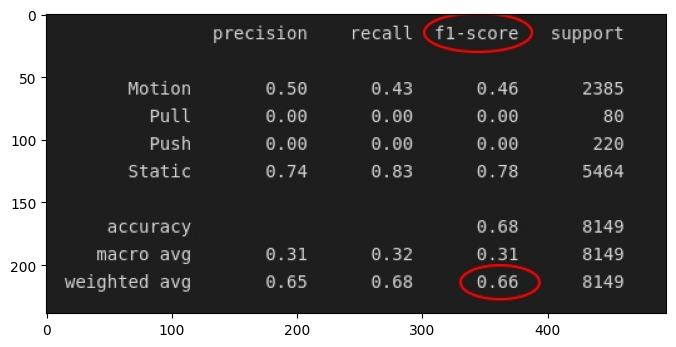

In [19]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/move_shot_cnn_rnn_68%_metrics.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,12))
plt.imshow(img2)
plt.show()

##### 2.3 Data Augmentation for Movement Shot

To solve the few data problem, we decided to use video data augmentation. We investigated different frameworks and methods, and finally, we used the following work:

https://github.com/okankop/vidaug

This python library uses the following packages: NumPy, PIL, scipy, skimage, and OpenCV.

##### Working with the dataset

The original dataset contains a folder called "trailer" which contains the four classes of videos. Besides, another folder called "trailer_v2" contains only 76 videos from Pull and 530 from Push. 

We took all this data, only from Pull and Push classes, and we made data augmentation.

The data augmentation library allowed us to make 18 different types of video transformation, like horizontal and vertical flips, center crop, translate, random rotation, invert color, gaussian blur, Upsample, downsample, salt (white pixels), pepper (black pixels), and others.

Using that, we made two new folders with video augmentation, one for each minority class:

Trailer_aug_pull --> with 1615 new videos

Trailer_aug_push --> with 2650 new 

The implementation of data aug is in: `notebooks/data_augmentation` and the original library is in: `/data_augmentation`

##### 2.4 CNN+RNN for Movement Shot with Data aug

We built the embeddings of the new videos, added them to the original embeddings, and then trained the GRU model with all the data, but the model still didn't work. We obtained the same results without data aug, or even worse.

So we started to think that the model wasn't able to learn about all the classes, because it presented some extra complexity:

The model must learn not the content of the videos (every video has different content) but also the camera movement. And maybe the current model wasn't enough to understand that. 

So we started to work with a new model.



### 3. CNN 3D (2D+1)

##### 3.1 Model

We saw that the CNN 2D + RNN was successful for scale shot, but it wasn’t appropriate for movement shot.

So, for movement shot type we used a new model:
ResNet 18 3D (2+1)D

This model was implemented in a notebook in folder: `/notebooks/CNN3D/video_classification_CNN3d_movement.ipynb`


What’s the difference between 2D and 3D CNN models?

A 3D CNN uses a three-dimensional filter to perform convolutions. The kernel is able to slide in three directions, whereas in a 2D CNN it can slide in two dimensions

Instead of operating on a single image with dimensions (height, width), like standard ResNets, these operate on video volume (time, height, width).

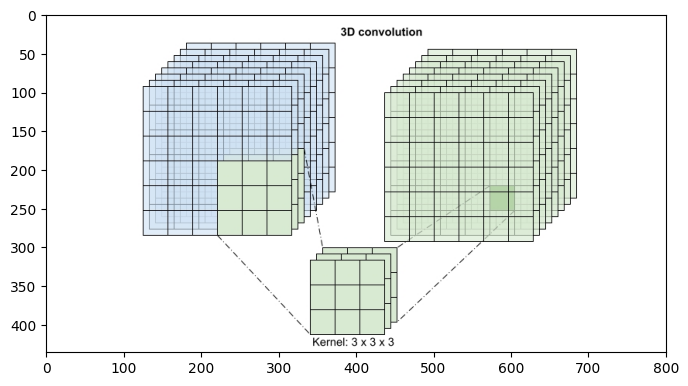

In [20]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/cnn3d_kernels.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,12))
plt.imshow(img2)
plt.show()

If we analyze this model more deeply, 3D is really a (2 + 1)D convolution with residual connections. Keeping in mind the residual connections, we’ll see it in the next slide.

The (2 + 1)D convolution allows the decomposition of the spatial and temporal dimensions, creating two separate steps. An advantage of this approach is that factorizing the convolutions into spatial and temporal dimensions saves parameters.

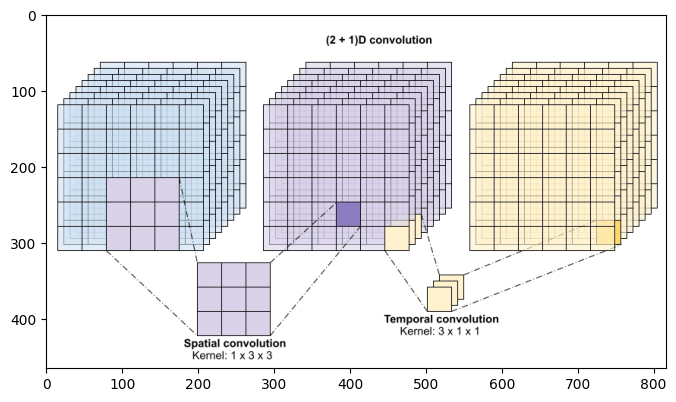

In [21]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/cnn3d_kernels2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,12))
plt.imshow(img2)
plt.show()

This ResNet model is made of a sequence of residual blocks.

A residual block has two branches.

The main branch performs the calculation, but it is difficult for gradients to flow through.
The residual branch bypasses the main calculation and mostly just adds the input to the output of the main branch.

Gradients flow easily through this branch. Therefore, an easy path from the loss function to any of the residual block's main branch will be present. This avoids the vanishing gradient problem.

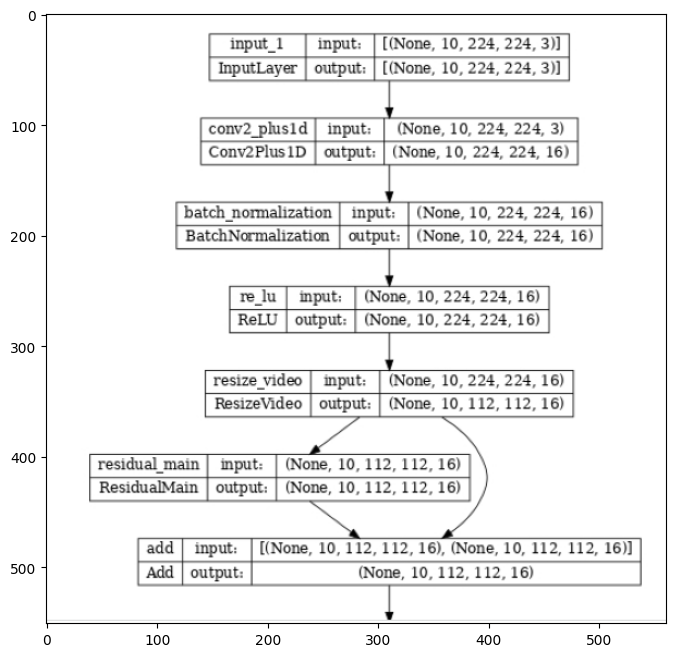

In [28]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/conv3d_residual_connections.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,12))
plt.imshow(img2)
plt.show()

##### 3.2 Training with data augmentation

Due to the low quantity of videos for the minority classes, we decided to add data augmentation videos to improve the model training.


Besides, We split the training into two stages, due to the long duration of each one, with a total of 75 + 35 = 110 epochs:

The First stage consists of 75 epochs:

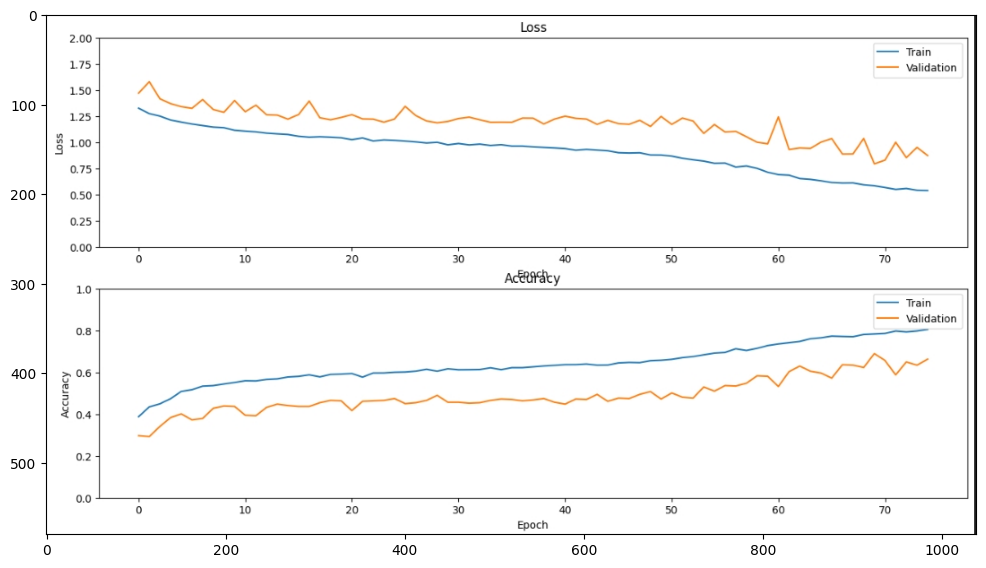

In [26]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/conv3d_train_plots.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,15))
plt.imshow(img2)
plt.show()

The Second stage of train consists of others 35 epochs (75-110)

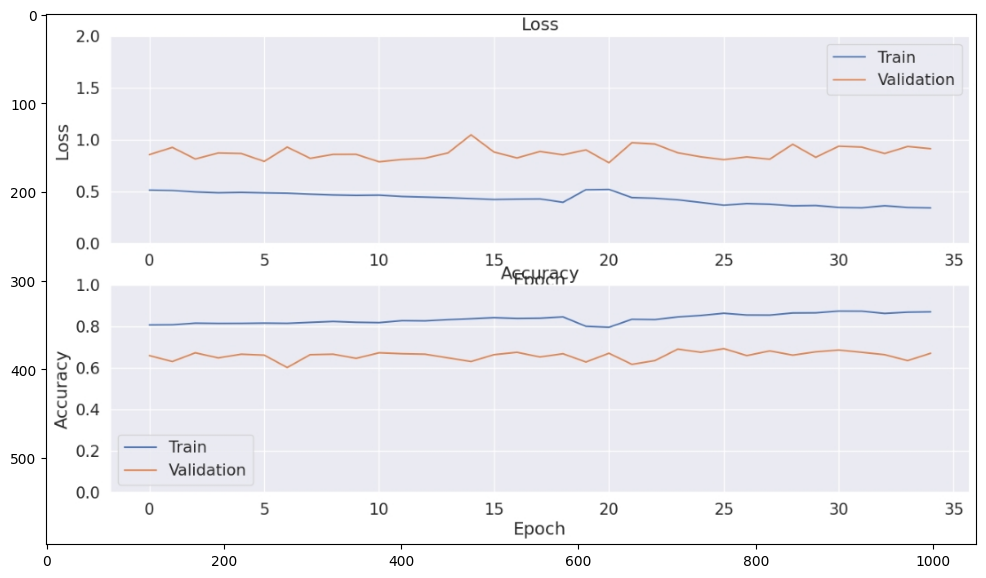

In [27]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/conv3d_train_plots2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,15))
plt.imshow(img2)
plt.show()

##### 3.3 Results

With this model, we obtained the same accuracy (68%) as CNN+RNN, but we've achieved two important goals:

1. The model recognized the two minority classes and is working with the four classes.

2. f1-score has improved from 66% to 73%. This 6% is added by the two minority classes.

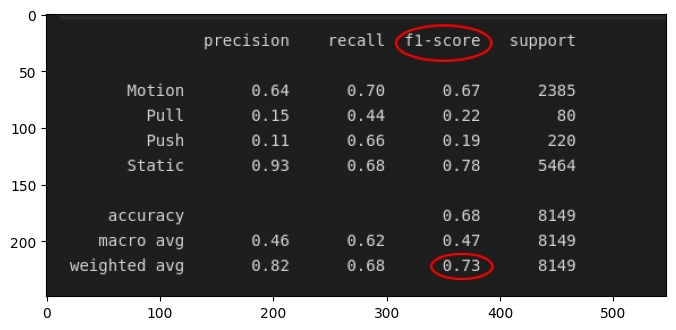

In [22]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/move_shot_conv3d_73%_f1_metrics.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,12))
plt.imshow(img2)
plt.show()

Now we can see in the confusion matrix that all the classes appear

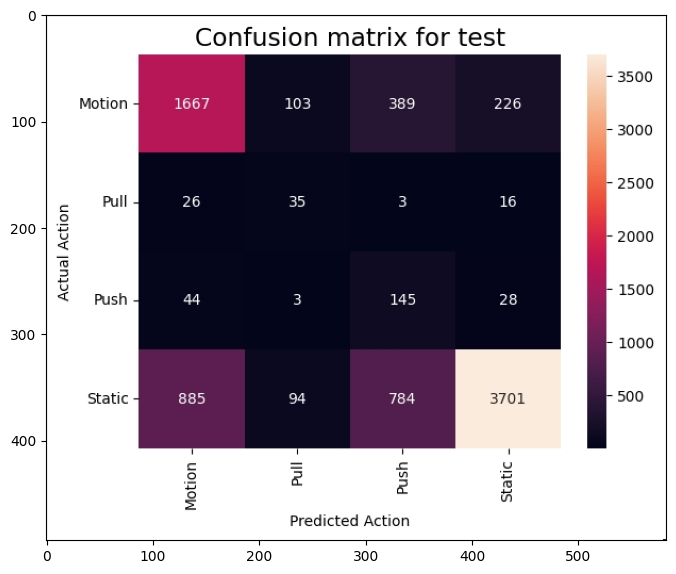

In [24]:
img2 = cv2.imread('/home/danield/AnyoneAI/Curso/final_project/final_report/cnn+lstm/final-project-shot-type/Final_report/images/move_shot_conv3d_73%_f1_confusion.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,12))
plt.imshow(img2)
plt.show()

##### 3.4 Final Conclussions

1. We were presented with a great challenge with this project. We had to read a white paper and implemented it, having to get nearly the results. Besides, we have to work with a video dataset, so which added an extra challenge due to its computational complexity.

2. We can solve scale shot type in a relatively short time, getting results of 84% of accuracy, near the 87.7% that the paper's authors had achieved. 

3. For movement shot type we have to work with a highly unbalanced dataset with two classes with few videos. That represented a big challenge for us and we have working with two models and different methods, like data augmentation, to solve it. 

4. Due to the unbalanced dataset, we had to add other metrics to our work like precision, recall, and F1-score because they allow seeing the performance of all classes.

5. The second model (CNN 2D+1) presented a better performance than the first in the F1 score, precision, and recall of minority classes. This could be because it builds the embeddings taking together the three dimensions (the two spatial and the temporal) so all the information of each video is compressed and transformed into a numeric expression in the same process, allowing better training for the model.

6. The reference paper didn't show precision, recall, or F1 score metrics, it shows only accuracy. Because of that, we can't compare the performance of the models referring to the capacity of the model to learn about each class. But we discuss it with our team and concluded that the paper needs to show other metrics instead of accuracy. In movement shot type, F1 is a better metric than accuracy.

7. We can improve the model's performance from 66% of F1 (CNN+RNN) to 73% (CNN 2D+1) using data augmentation and doing a lot of experiments. If we had more time we could try other models and build a variance map as the paper's authors

8. To show the project, we used Gradio to make a demo. I added it but it can't be running because the project assignment explains to us that we don't have to submit models, weights, or videos. We can play our demo on Demo Day.